# Importing Modules

In [85]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [86]:
!pip install scikit-learn==1.3.0

# Loading the Dataset

In [87]:
df=pd.read_csv('IRIS.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [88]:
df=df.drop(columns=['Id'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [89]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [91]:
df['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

# Preprocessing Dataset


In [92]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

# Data Analysis 

<Axes: >

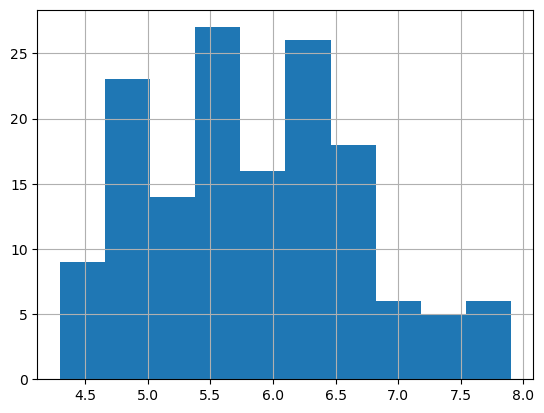

In [93]:
df['SepalLengthCm'].hist()

<Axes: >

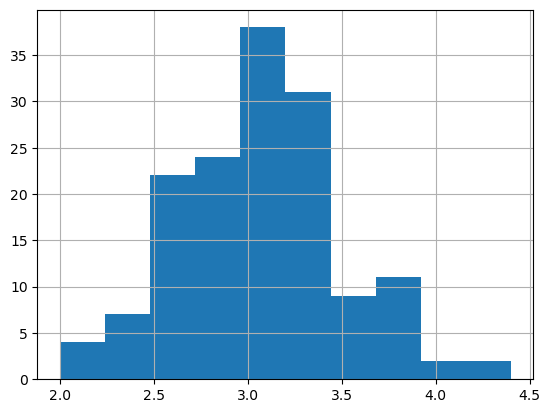

In [94]:
df['SepalWidthCm'].hist()

<Axes: >

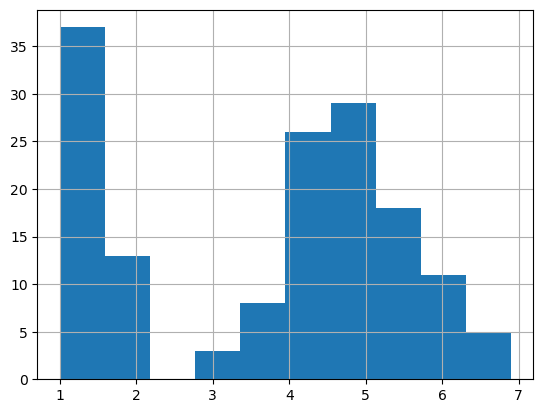

In [95]:
df['PetalLengthCm'].hist()

<Axes: >

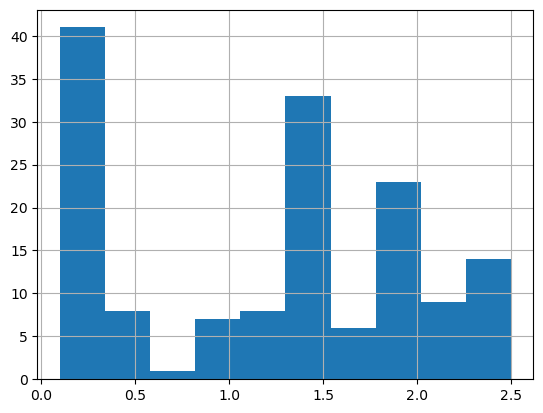

In [96]:
df['PetalWidthCm'].hist()

In [97]:
colors=['red','orange','blue']
species=['Iris-virginica','Iris-versicolor','Iris-setosa']

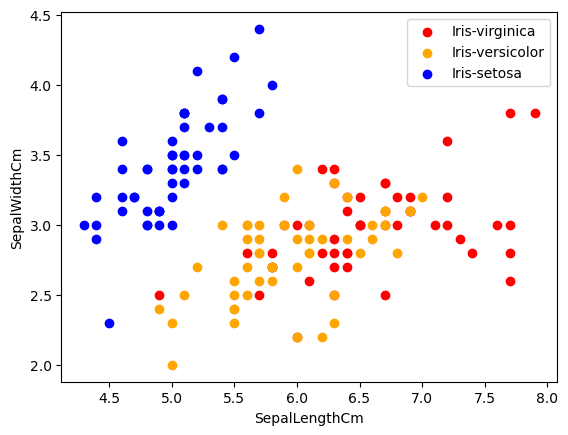

In [98]:
for i in range(3):
    x=df[df['Species']==species[i]]
    plt.scatter(x['SepalLengthCm'],x['SepalWidthCm'],c=colors[i],label=species[i])
plt.xlabel("SepalLengthCm")
plt.ylabel("SepalWidthCm")
plt.legend()

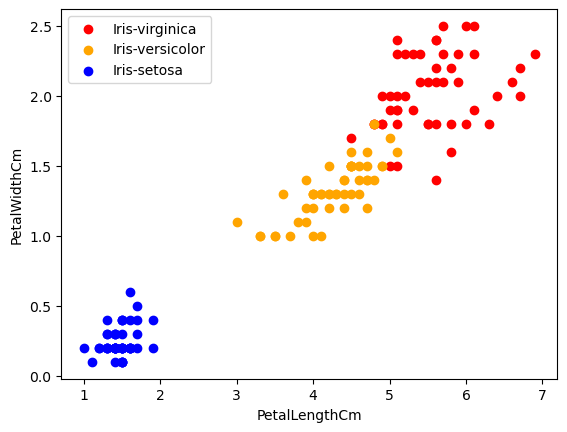

In [99]:
for i in range(3):
    x=df[df['Species']==species[i]]
    plt.scatter(x['PetalLengthCm'],x['PetalWidthCm'],c=colors[i],label=species[i])
plt.xlabel("PetalLengthCm")
plt.ylabel("PetalWidthCm")
plt.legend()

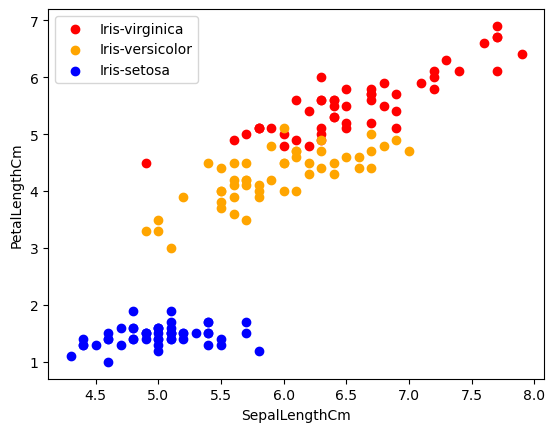

In [100]:
for i in range(3):
    x=df[df['Species']==species[i]]
    plt.scatter(x['SepalLengthCm'],x['PetalLengthCm'],c=colors[i],label=species[i])
plt.xlabel("SepalLengthCm")
plt.ylabel("PetalLengthCm")
plt.legend()

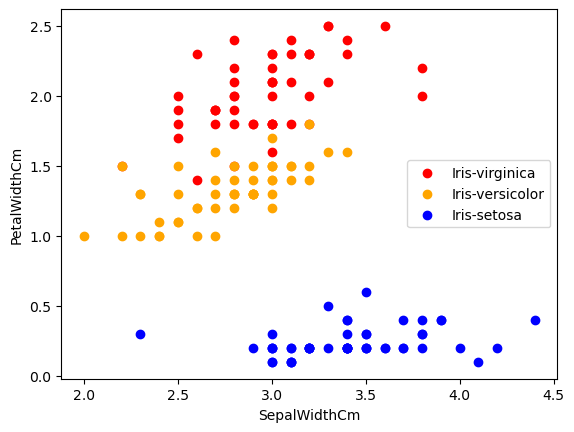

In [101]:
for i in range(3):
    x=df[df['Species']==species[i]]
    plt.scatter(x['SepalWidthCm'],x['PetalWidthCm'],c=colors[i],label=species[i])
plt.xlabel("SepalWidthCm")
plt.ylabel("PetalWidthCm")
plt.legend()

# Correlation Matrix

In [102]:

# Assuming df is your DataFrame
numeric_df = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_df.corr()

# Print or use the correlation matrix as needed
print(correlation_matrix)

               SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
SepalLengthCm       1.000000     -0.109369       0.871754      0.817954
SepalWidthCm       -0.109369      1.000000      -0.420516     -0.356544
PetalLengthCm       0.871754     -0.420516       1.000000      0.962757
PetalWidthCm        0.817954     -0.356544       0.962757      1.000000


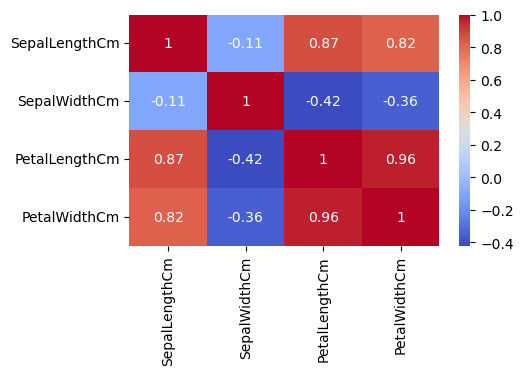

In [103]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Check for and handle non-numeric values
numeric_df = numeric_df.apply(pd.to_numeric, errors='coerce')

# Calculate the correlation matrix
corr = numeric_df.corr()

# Create a heatmap
fig, ax = plt.subplots(figsize=(5, 3))
sns.heatmap(corr, annot=True, ax=ax, cmap='coolwarm')

# Show the plot
plt.show()

# Model Training and Testing

In [104]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import pickle
X=df.drop(columns=['Species'])
Y=df['Species']
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.30)

In [105]:
model=LogisticRegression()
model.fit(x_train,y_train)
print(" Logistic Regression Accuracy: ",model.score(x_test,y_test)*100)

 Logistic Regression Accuracy:  93.33333333333333


In [106]:
model=KNeighborsClassifier()
model.fit(x_train,y_train)
print(" K-nearest neighbors Accuracy: ",model.score(x_test,y_test)*100)

 K-nearest neighbors Accuracy:  91.11111111111111


In [107]:
model=DecisionTreeClassifier()
model.fit(x_train,y_train)
print(" Decision Tree Accuracy: ",model.score(x_test,y_test)*100)

 Decision Tree Accuracy:  88.88888888888889


In [108]:
import pickle
filename='saved_model.sav'
pickle.dump(model,open(filename,'wb'))

In [109]:
load_model=pickle.load(open(filename,'rb'))

In [112]:
load_model.predict([[6.0,2.2,4.0,1.0]])

array(['Iris-versicolor'], dtype=object)

In [113]:
import sklearn
print(sklearn.__version__)

1.3.0


In [114]:
x_test.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
110,6.5,3.2,5.1,2.0
6,4.6,3.4,1.4,0.3
120,6.9,3.2,5.7,2.3
54,6.5,2.8,4.6,1.5
79,5.7,2.6,3.5,1.0


In [116]:
load_model.predict([[4,3,1,5]])

array(['Iris-setosa'], dtype=object)